In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/amazon-prime-movies-and-tv-shows/amazon_prime_titles.csv')
rows, columns = df.shape
print("no of row =", rows)
print("no of columns=", columns)

no of row = 9668
no of columns= 12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,9668,9668,9668,7585,8435,672,155,9668.000000,9331,9668,9668,9668
unique,9668,2,9668,5773,7927,86,84,NaN,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,"March 30, 2021",NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.341849,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.922482,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [7]:
df = df.rename(columns={'date_added': 'date_added_platform', 'duration': 'duration_seconds', 'listed_in': 'gender_type', 'type': 'movie_or_tv_show'})
df[:5]

,show_id,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,rating,duration_seconds,gender_type,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [8]:
df.drop(columns=['rating', 'show_id'], axis=1, inplace=True)

In [9]:
df['cast'] = df['cast'].fillna('Cast not Available')
df['director'] = df['director'].fillna('uninformed director')
df['country'] = df['country'].fillna('uninformed country')

In [10]:
df.isna().sum()

movie_or_tv_show          0
title                     0
director                  0
cast                      0
country                   0
date_added_platform    9513
release_year              0
duration_seconds          0
gender_type               0
description               0
dtype: int64

In [11]:
if 'Movie' != 'movie':
    print('true')
else:
    print('false')

true


In [12]:
df['gender_type'] =  df['gender_type'].apply(lambda x: x.upper())
df.tail(2)

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description
9666,TV Show,Maradona: Blessed Dream,uninformed director,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",uninformed country,NaN,2021,1 Season,"DRAMA, SPORTS","The series tells the story of Diego Maradona, ..."
9667,Movie,Harry Brown,Daniel Barber,"Michael Caine, Emily Mortimer, Joseph Gilgun, ...",uninformed country,NaN,2010,103 min,"ACTION, DRAMA, SUSPENSE","Harry Brown, starring two-time Academy Award w..."


In [13]:
df['gender_type']

0                 COMEDY, DRAMA
1          DRAMA, INTERNATIONAL
2       ACTION, DRAMA, SUSPENSE
3                   DOCUMENTARY
4                DRAMA, FANTASY
                 ...           
9663                     COMEDY
9664                   TV SHOWS
9665                     ACTION
9666              DRAMA, SPORTS
9667    ACTION, DRAMA, SUSPENSE
Name: gender_type, Length: 9668, dtype: object

In [14]:
df_split = df['gender_type'].str.split(',', expand = True)
df_split = df_split.fillna('-')
df_split

,0,1,2,3,4
0,COMEDY,DRAMA,-,-,-
1,DRAMA,INTERNATIONAL,-,-,-
2,ACTION,DRAMA,SUSPENSE,-,-
3,DOCUMENTARY,-,-,-,-
4,DRAMA,FANTASY,-,-,-
...,...,...,...,...,...
9663,COMEDY,-,-,-,-
9664,TV SHOWS,-,-,-,-
9665,ACTION,-,-,-,-
9666,DRAMA,SPORTS,-,-,-


In [15]:
group_dummies = [pd.get_dummies(df_split[y].apply(lambda x: x.strip()), dtype='int') for y in df_split.columns]
group_dummies[0].shape

(9668, 29)

In [16]:
group_dummies = pd.concat(group_dummies, axis=1)
group_dummies = group_dummies.fillna(0).astype('uint8')
group_dummies

,ACTION,ADVENTURE,ANIMATION,ANIME,ARTHOUSE,ARTS,COMEDY,DOCUMENTARY,DRAMA,FAITH AND SPIRITUALITY,...,MILITARY AND WAR,MUSIC VIDEOS AND CONCERTS,ROMANCE,SCIENCE FICTION,SPECIAL INTEREST,SUSPENSE,TALK SHOW AND VARIETY,UNSCRIPTED,WESTERN,YOUNG ADULT AUDIENCE
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9663,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9664,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9665,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9666,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df['title']=df['title'].apply(lambda x : x.upper())
df['title'].head(10)

0      THE GRAND SEDUCTION
1     TAKE CARE GOOD NIGHT
2     SECRETS OF DECEPTION
3       PINK: STAYING TRUE
4            MONSTER MAKER
5    LIVING WITH DINOSAURS
6                HIRED GUN
7             GREASE LIVE!
8          GLOBAL MELTDOWN
9           DAVID'S MOTHER
Name: title, dtype: object

In [18]:
X_genre_type = np.array(group_dummies)
X_genre_type

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
model_view = KMeans()

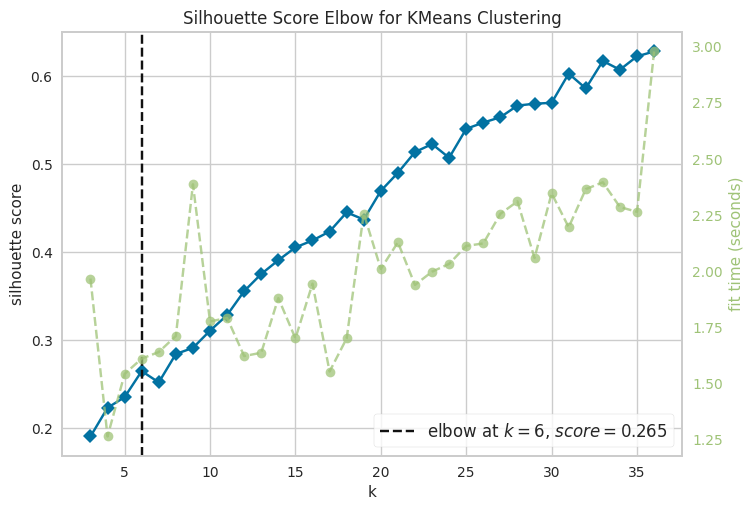

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [20]:
visualizer = KElbowVisualizer(model_view, k=(3,37), metric='silhouette')

visualizer.fit(X_genre_type)        
visualizer.show()

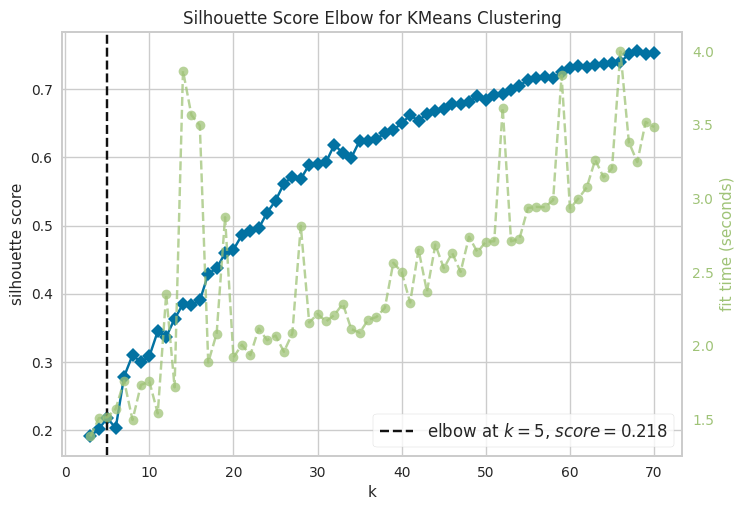

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
visualizer = KElbowVisualizer(model_view, k=(3,71), metric='silhouette')

visualizer.fit(X_genre_type)        
visualizer.show()

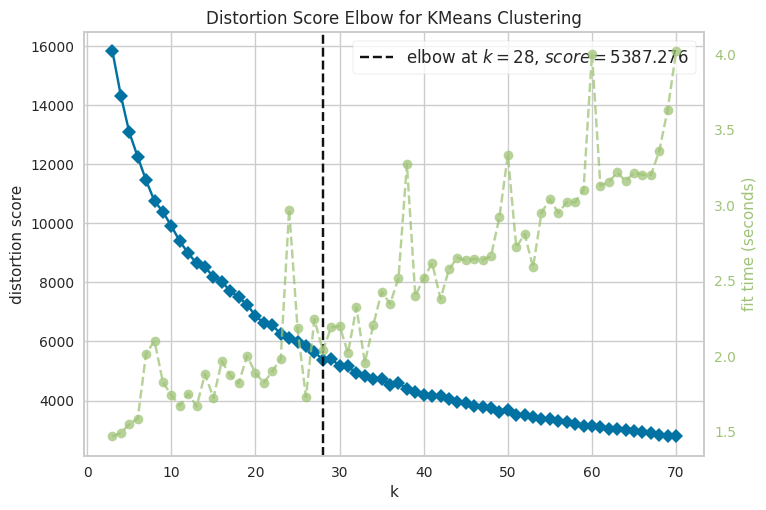

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
visualizer = KElbowVisualizer(model_view, k=(3,71), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

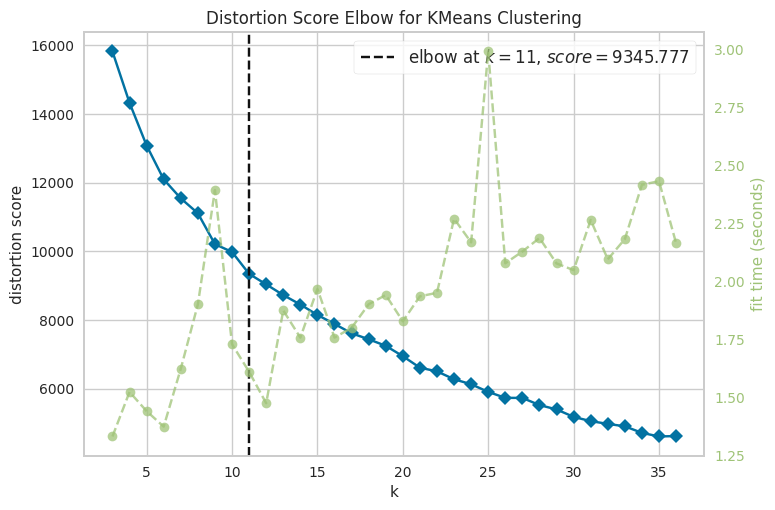

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
model = KMeans()
visualizer = KElbowVisualizer(model_view, k=(3,37), metric='distortion')

visualizer.fit(X_genre_type)        
visualizer.show()

In [25]:
kmeans_model = KMeans(n_clusters = 3, random_state=0)
y_Kmeans3 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans3)
print(np.unique(y_Kmeans3))
print(len(np.unique(y_Kmeans3)))
print(f'Amount genre: {len(group_dummies.columns)}')

[1 1 1 ... 0 1 1]
[0 1 2]
3
Amount genre: 119


In [26]:
kmeans_model = KMeans(n_clusters = 13, random_state=0)
y_Kmeans13 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans13)
print(np.unique(y_Kmeans13))
print(len(np.unique(y_Kmeans13)))
print(f'Amount genre: {len(group_dummies.columns)}')

[ 7  6  3 ... 10  6  3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
13
Amount genre: 119


In [27]:
kmeans_model = KMeans(n_clusters = 27, random_state=0)
y_Kmeans27 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans27)
print(np.unique(y_Kmeans27))
print(len(np.unique(y_Kmeans27)))
print(f'Amount genre: {len(group_dummies.columns)}')

[ 5 23 13 ...  0 23 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
27
Amount genre: 119


In [28]:
means_model = KMeans(n_clusters = 37, random_state=0)
y_Kmeans37 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans37)
print(np.unique(y_Kmeans37))
print(len(np.unique(y_Kmeans37)))
print(f'Amount genre: {len(group_dummies.columns)}')

[ 5 23 13 ...  0 23 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
27
Amount genre: 119


In [29]:
kmeans_model = KMeans(n_clusters = 35, random_state=0)
y_Kmeans35 = kmeans_model.fit_predict(X_genre_type)
print(y_Kmeans35)
print(np.unique(y_Kmeans35))
print(len(np.unique(y_Kmeans35)))
print(f'Amount genre: {len(group_dummies.columns)}')

[ 7 17 23 ... 31 33 23]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
35
Amount genre: 119


In [30]:
data_amazon_cluster = df.copy()

In [31]:
data_amazon_cluster['clusters_genre'] = y_Kmeans35

In [32]:
data_amazon_cluster.head()

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description,clusters_genre
0,Movie,THE GRAND SEDUCTION,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,113 min,"COMEDY, DRAMA",A small fishing village must procure a local d...,7
1,Movie,TAKE CARE GOOD NIGHT,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,110 min,"DRAMA, INTERNATIONAL",A Metro Family decides to fight a Cyber Crimin...,17
2,Movie,SECRETS OF DECEPTION,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,74 min,"ACTION, DRAMA, SUSPENSE",After a man discovers his wife is cheating on ...,23
3,Movie,PINK: STAYING TRUE,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,69 min,DOCUMENTARY,"Pink breaks the mold once again, bringing her ...",9
4,Movie,MONSTER MAKER,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,45 min,"DRAMA, FANTASY",Teenage Matt Banting wants to work with a famo...,33


In [33]:
name = 'SECRETS OF DECEPTION'.upper()
data_amazon_cluster[data_amazon_cluster['title'] ==  name] 

,movie_or_tv_show,title,director,cast,country,date_added_platform,release_year,duration_seconds,gender_type,description,clusters_genre
2,Movie,SECRETS OF DECEPTION,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,74 min,"ACTION, DRAMA, SUSPENSE",After a man discovers his wife is cheating on ...,23


In [34]:
data_amazon_cluster[data_amazon_cluster['title'] ==  name][['clusters_genre', 'gender_type']]

,clusters_genre,gender_type
2,23,"ACTION, DRAMA, SUSPENSE"


In [35]:
data_amazon_cluster[data_amazon_cluster['clusters_genre'] ==  23 ][['title', 'gender_type']]

,title,gender_type
2,SECRETS OF DECEPTION,"ACTION, DRAMA, SUSPENSE"
90,WIND,"ACTION, DRAMA, SPORTS"
117,WHERE LOVE FOUND ME,"ACTION, DRAMA, SPECIAL INTEREST"
153,WAR (TELUGU),"ACTION, DRAMA, SUSPENSE"
154,WAR (TAMIL),"ACTION, DRAMA, SUSPENSE"
...,...,...
9473,WARNING FROM SPACE,"ACTION, DRAMA, SCIENCE FICTION"
9547,HERO AND THE TERROR,"ACTION, DRAMA, SUSPENSE"
9607,ARDHA SHATHABDHAM,"ACTION, DRAMA, ROMANCE"
9656,ANAGANAGA OKA NENU,"ACTION, DRAMA, SUSPENSE"


In [36]:
from dataclasses import dataclass

@dataclass
class QueryRecommends:
    dataset: pd.core.frame.DataFrame
    name: str 
    top_n: int = 10

def recommends(query: QueryRecommends) -> pd.core.frame.DataFrame:
    result = query['dataset'][query['dataset']['title'] == query['name'].upper()][['clusters_genre']].reset_index()
    result = result.at[0, 'clusters_genre']
    return query['dataset'][query['dataset']['clusters_genre'] == int(result)][['title', 'gender_type']][:query['top_n']]

# **Final Recommendation:**

In [38]:
result = recommends({'dataset': data_amazon_cluster, 'name': 'thappad', 'top_n': 10})
result

,title,gender_type
9,DAVID'S MOTHER,DRAMA
24,ZANDALEE,DRAMA
32,YOUNG LOVERS,DRAMA
36,YOU'RE NOT YOU,DRAMA
67,WORLD WAR II: WHEN LIONS ROARED,DRAMA
73,WORDS ON BATHROOM WALLS,DRAMA
82,"WIZARD OF LONELINESS, THE",DRAMA
83,WITHIN OUR GATES,DRAMA
115,WHITE DRAGON,DRAMA
116,WHISTLE STOP,DRAMA


In [40]:
result = recommends({'dataset': data_amazon_cluster, 'name': 'SECRETS OF DECEPTION', 'top_n': 10})
result

,title,gender_type
2,SECRETS OF DECEPTION,"ACTION, DRAMA, SUSPENSE"
90,WIND,"ACTION, DRAMA, SPORTS"
117,WHERE LOVE FOUND ME,"ACTION, DRAMA, SPECIAL INTEREST"
153,WAR (TELUGU),"ACTION, DRAMA, SUSPENSE"
154,WAR (TAMIL),"ACTION, DRAMA, SUSPENSE"
162,WAKE IN FRIGHT,"ACTION, DRAMA, SUSPENSE"
178,VISWASAM,"ACTION, DRAMA, INTERNATIONAL"
197,VATICAN MIRACLE EXAMINER,"ANIME, DRAMA, INTERNATIONAL"
203,V (TAMIL),"ACTION, DRAMA, SUSPENSE"
204,V (MALAYALAM),"ACTION, DRAMA, SUSPENSE"
